In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [8]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
x

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [13]:
x['company_n'] = le_company.fit_transform(x['company'])
x

,company,job,degree,company_n
0,google,sales executive,bachelors,2
1,google,sales executive,masters,2
2,google,business manager,bachelors,2
3,google,business manager,masters,2
4,google,computer programmer,bachelors,2
5,google,computer programmer,masters,2
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,0


In [14]:
x['job_n'] = le_job.fit_transform(x['job'])
x['degree_n'] = le_degree.fit_transform(x['degree'])

In [15]:
x

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [25]:
x = x.drop(['company','job','degree'],axis='columns')
x

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [27]:
from sklearn import tree

In [28]:
model = tree.DecisionTreeClassifier()

In [31]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [32]:
model.score(x_test, y_test)

0.75

In [34]:
model.predict([[1,2,1]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

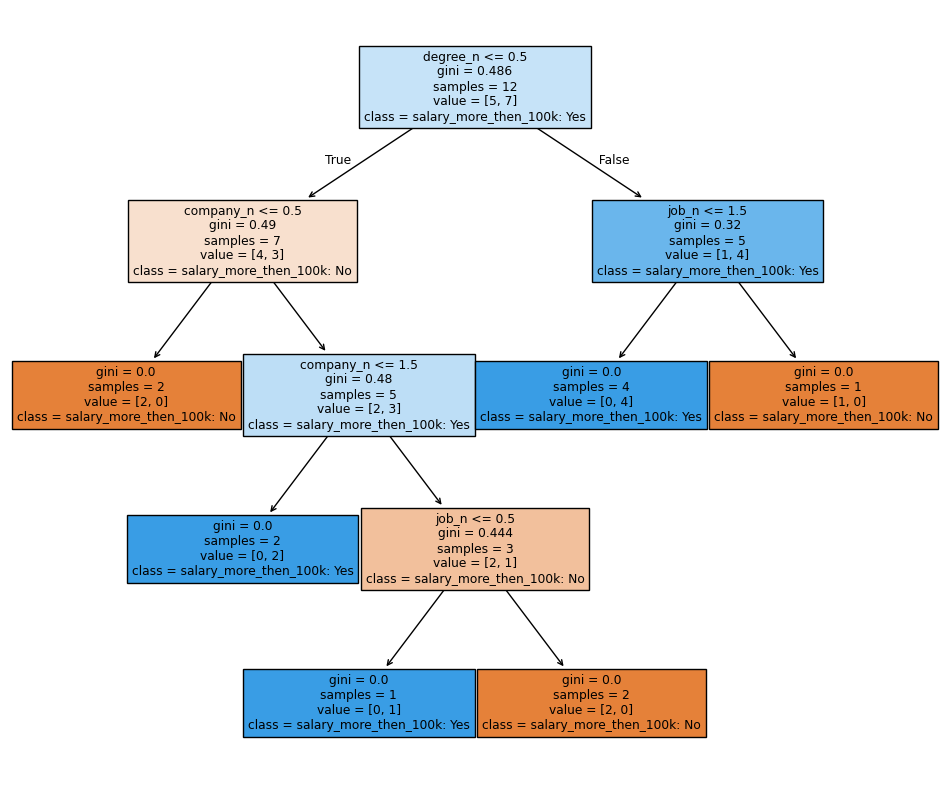

In [36]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
tree.plot_tree(model,
               feature_names=['company_n', 'job_n', 'degree_n'],
               class_names=['salary_more_then_100k: No', 'salary_more_then_100k: Yes'],
               filled=True)
plt.show()

In [35]:
"""
Decision Trees are a powerful and popular machine learning algorithm, particularly effective in scenarios where the decision-making process is transparent and easily understandable. Here are some examples of where they excel and why:

**1. Medical Diagnosis:**

*   **Example:** A decision tree can be built to help diagnose a patient's illness based on their symptoms.
*   **Why it works well:**
    *   **Interpretability:** Doctors can easily follow the tree's logic to understand how a diagnosis was reached. This is crucial for trust and verification.
    *   **Handles Mixed Data:** It can handle a mix of numerical data (e.g., blood pressure, temperature) and categorical data (e.g., symptoms like 'headache', 'cough').
    *   **Rule-Based:** The tree's structure mimics the way a doctor might think through a diagnosis, asking a series of questions to narrow down the possibilities.

**2. Customer Churn Prediction:**

*   **Example:** A telecommunications company wants to predict which customers are likely to cancel their service.
*   **Why it works well:**
    *   **Identifies Key Factors:** The tree can highlight the most important factors that lead to churn (e.g., high monthly bills, poor customer service interactions, contract expiration).
    *   **Actionable Insights:** The rules generated by the tree are easy to understand and can be used to create targeted retention strategies. For example, if the tree shows that customers with a certain plan are likely to churn, the company can offer them a better deal.
    *   **Handles Non-linear Relationships:**  Decision trees can capture complex relationships in the data that other models might miss.

**3. Loan Application Approval:**

*   **Example:** A bank wants to decide whether to approve a loan application.
*   **Why it works well:**
    *   **Transparency for Regulations:** Financial institutions often need to explain their lending decisions to regulators. A decision tree provides a clear, auditable trail.
    *   **Handles Missing Values:** Decision trees can be adapted to handle missing information in an application.
    *   **Business Rule Generation:** The tree can be used to create a set of rules for loan officers to follow, ensuring consistency in decision-making.

**Why Decision Trees are Effective in these cases:**

*   **Easy to Understand and Interpret:** Their visual, flowchart-like structure makes them intuitive, even for non-technical audiences.
*   **Require Little Data Preprocessing:** They can handle both numerical and categorical data and are less sensitive to outliers and scaling than some other models.
*   **Non-parametric:** They don't make strong assumptions about the underlying distribution of the data.
"""

"\nDecision Trees are a powerful and popular machine learning algorithm, particularly effective in scenarios where the decision-making process is transparent and easily understandable. Here are some examples of where they excel and why:\n\n**1. Medical Diagnosis:**\n\n*   **Example:** A decision tree can be built to help diagnose a patient's illness based on their symptoms.\n*   **Why it works well:**\n    *   **Interpretability:** Doctors can easily follow the tree's logic to understand how a diagnosis was reached. This is crucial for trust and verification.\n    *   **Handles Mixed Data:** It can handle a mix of numerical data (e.g., blood pressure, temperature) and categorical data (e.g., symptoms like 'headache', 'cough').\n    *   **Rule-Based:** The tree's structure mimics the way a doctor might think through a diagnosis, asking a series of questions to narrow down the possibilities.\n\n**2. Customer Churn Prediction:**\n\n*   **Example:** A telecommunications company wants to pr